In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

original = pd.read_csv('ml/titanic/train.csv', index_col='PassengerId')
original.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

In [61]:
from sklearn import preprocessing


data = original.copy()

data = data[np.isfinite(data['Age'])]

le = preprocessing.LabelEncoder()
data['Embarked'] = data.Embarked.fillna('S')
data['Embarked'] = le.fit_transform(data['Embarked'])

le2 = preprocessing.LabelEncoder()
data['Sex'] = le2.fit_transform(data['Sex'])

data['Family'] = data['SibSp'] + data['Parch']

data['NotAlone'] = (data['Family'] > 0) & (data['Family'] < 4)

data['RichWomen'] = (data['Sex'] == 0) & (data['Pclass'] == 1)

data['Child'] = data["Age"] < 16

data['Female'] = (data['Sex'] == 0) & (data["Age"] >= 16)

data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir', 'Dona']
data.Title = data.Title.replace(rare_titles, 'Rare')
data['Title'] = data.Title.apply(lambda x: ['Mr', 'Mrs', 'Miss', 'Master', 'Rare'].index(x))

data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,NotAlone,RichWomen,Child,Female,Title
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,True,False,False,False,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,True,True,False,True,1
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,False,False,False,True,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,True,True,False,True,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,False,False,False,False,0
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2,0,False,False,False,False,0
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,4,False,False,True,False,3
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,2,True,False,False,True,1
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,1,True,False,True,False,1


In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#X = data[['Pclass', 'FemaleOrChild', 'RichWomen', 'PoorMan', 'Age', 'NotAlone', 'Fare', 'Embarked']]
#X = data[['Pclass', 'Female', 'Child', 'RichWomen', 'Age', 'NotAlone', 'Fare', 'Embarked']]
#X = data[['Pclass', 'RichWomen', 'Sex', 'Child', 'Age', 'NotAlone', 'Fare', 'Embarked', 'Title']]
#X = data[['Pclass', 'RichWomen', 'FemaleOrChild', 'NotAlone', 'Fare']]
#X = data[['Pclass', 'RichWomen', 'Female', 'Child', 'FemaleNotAlone', 'Fare']]
X = data[['Sex', 'Fare', 'Age', 'Pclass', 'Title']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

forest = RandomForestClassifier(max_depth=10, n_estimators=30).fit(X_train, y_train)
score1 = cross_val_score(forest, X, y, cv=3)
print("[Random Forest] train score:", forest.score(X_train, y_train))
print("[Random Forest] test score: ", forest.score(X_test, y_test))
print("[Random Forest] Cross validation:")
print(score1)
print(score1.mean())

print('-' * 50)

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(C=100, gamma=0.01)),
])
pipeline.fit(X_train, y_train)
score = cross_val_score(pipeline, X, y, cv=3)
print("[SVC] train score:", pipeline.score(X_train, y_train))
print("[SVC] test score: ", pipeline.score(X_test, y_test))
print("[SVC] Cross validation:")
print(score)
print(score.mean())

[Random Forest] train score: 0.9682242990654205
[Random Forest] test score:  0.8268156424581006
[Random Forest] Cross validation:
[0.79916318 0.84453782 0.84810127]
0.8306007536217178
--------------------------------------------------
[SVC] train score: 0.8168224299065421
[SVC] test score:  0.7877094972067039
[SVC] Cross validation:
[0.78242678 0.81092437 0.79746835]
0.796939834140319


Feature ranking:
1. feature 4 (0.228190)
2. feature 1 (0.215647)
3. feature 0 (0.208283)
4. feature 2 (0.184679)
5. feature 3 (0.163201)


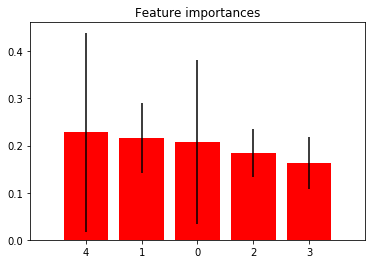

In [69]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [67]:
X

,Sex,Fare,Age,Pclass,Title
PassengerId,,,,,
1,1,7.2500,22.0,3,0
2,0,71.2833,38.0,1,1
3,0,7.9250,26.0,3,2
4,0,53.1000,35.0,1,1
5,1,8.0500,35.0,3,0
7,1,51.8625,54.0,1,0
8,1,21.0750,2.0,3,3
9,0,11.1333,27.0,3,1
10,0,30.0708,14.0,2,1


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

grid = [
    {
        'classifier': [SVC()],
        'preprocessing': [RobustScaler(), StandardScaler(), MinMaxScaler()],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier()],
        'preprocessing': [None],
        'classifier__n_estimators': [1, 10, 30, 50, 70, 100, 120],
        'classifier__max_depth': [2, 4, 6, 8, 10, 12, 15, 20]
    }
]

search = GridSearchCV(pipe, grid, cv=5)
search.fit(X_train, y_train)

print("Best params:\n{}\n".format(search.best_params_))
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Best params:
{'preprocessing': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 30, 'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)}

Best cross-validation score: 0.84
